<a href="https://colab.research.google.com/github/osama-ibrahim72/365-Math-Problems/blob/main/Linear_regression_(Random_Data_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authors


###Sohaila Diab 
###Osama Ibrahim 
###Rawan Khaled 

# Imports

In [ ]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython.display import display, Math, Latex
sns.set( color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate 1000 linear sample following the equation:
##Y = 5X + 3X + 1.5X +6

In [ ]:
X=  np.random.randint(5,5000,size=(1000, 3))
print(X)

[[2741 2075 4883]
 [2732 3299 3229]
 [2075  901 2989]
 ...
 [2029 2674 4687]
 [3058 2352  541]
 [3882 1769 4281]]


In [ ]:
Y = (5*X[:,0]) + (3*X[:,1]) +( 1.5*X[:,2]) + 6
Y = np.array(Y)
print(Y)

[27260.5 28406.5 17567.5 20531.  34549.5 26532.  22248.5 10838.  30131.5
 35856.5 30900.  43059.5 38380.5 30228.  19325.  25563.  34725.  17674.
 23741.5 21786.5 23199.5 35452.  24296.   8740.5 13465.5 14416.5 22451.
 33814.  31912.5 17686.5 25106.5 22898.5 15268.  40973.5 27486.  26493.5
 13161.5 20225.  33319.5 19329.5 23785.5 18587.  16704.  24388.5 12557.
 30539.  13045.  15426.5 21063.5  7498.  33791.5 26321.  18743.5 28481.
 18123.  23542.5 38335.  17502.5 38748.   9646.5 10904.   6863.  20949.
 33278.  10384.5 18569.  27231.5 29670.5 42767.  14018.  28330.   7704.
 21629.  34435.  26038.  40044.  32946.  19091.5 20981.5 21682.5 33225.5
  8754.  25363.5 15637.5 13482.5  8500.5 28915.5 36322.  23090.  42576.5
 11566.  36662.5 14852.5 39116.5 28443.5 32385.5 26367.5 33221.  27320.
 39531.  33140.5 19877.  15790.5 24708.  18668.5 35609.5  5963.  25744.
 27667.5 34635.  14390.  23158.5 22165.  14713.5 17760.  21096.  35628.5
 25081.5 31771.5 25029.5 25138.  32689.  26828.5 14073.5 26

In [ ]:
Y.shape, X.shape

((1000,), (1000, 3))

In [ ]:
# Create dataframe
data = {'feature1': X[:,0], 'feature2': X[:,1], 'feature3': X[:,2], 'labels': Y}  
df = pd.DataFrame(data)
df

,feature1,feature2,feature3,labels
0,2741,2075,4883,27260.5
1,2732,3299,3229,28406.5
2,2075,901,2989,17567.5
3,1903,3532,276,20531.0
4,4662,2342,2805,34549.5
...,...,...,...,...
995,3469,1090,4605,27528.5
996,1596,4882,3340,27642.0
997,2029,2674,4687,25203.5
998,3058,2352,541,23163.5


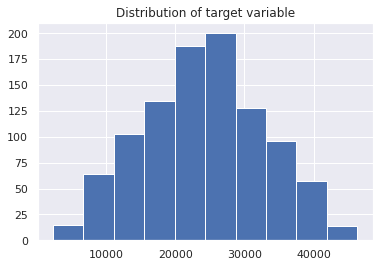

In [ ]:
plt.hist(Y);
plt.title('Distribution of target variable');

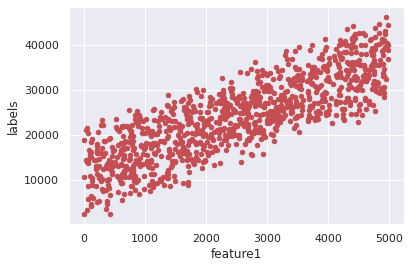

In [ ]:
df.plot(x='feature1', y='labels', kind='scatter', color='r');

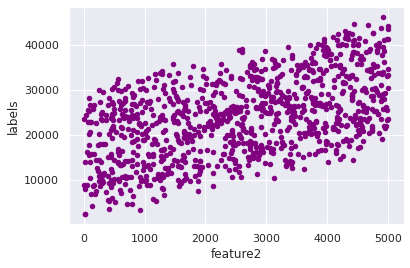

In [ ]:
df.plot(x='feature2', y='labels', kind='scatter',color='purple');

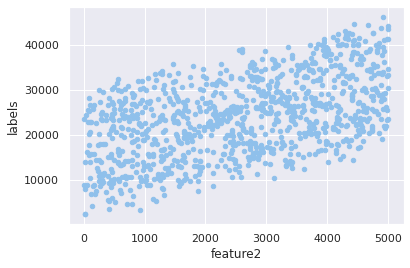

In [ ]:
df.plot(x='feature2', y='labels', kind='scatter',color='#8fc0eb');

# Built-in function to split the data to (train &test)

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying least square method

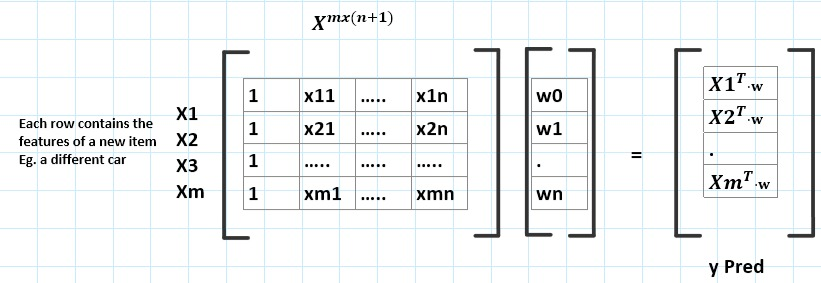

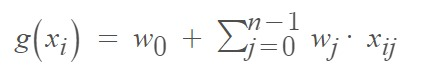

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
  '''
    inputs:
      X : Feature matrix
      y : Target values
      r : Regularization parameter

    output:
      bias 
      vector of weights
  '''
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r*np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

## Train

In [ ]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
w0, w 

(5.999920154059964, array([5.00000001, 3.00000001, 1.50000001]))

## Predict

In [ ]:
y_pred = w0 + X_test.dot(w)

## Evaluate

In [ ]:
# RMSE function
def rmse(y, y_pred):
  ''' 
    Find the RMSE (Root Mean Squared Error)

    input:
      y: actual values
      y_pred: prediction
    output:
      root mean squared error
  '''
  se = (y - y_pred) ** 2
  mse = se.mean()
  
  return np.sqrt(mse)

In [ ]:
print('RMSE: ', round(rmse(y_test, y_pred), 8))
print('R2: ', r2_score(y_test, y_pred))

RMSE:  2.64e-05
R2:  1.0


In [ ]:
df_test = pd.DataFrame({'actual': y_test, 'pred': list(y_pred), 'diff':abs(y_test-y_pred)}, columns=['actual', 'pred', 'diff'])
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
actual,24502.500000,40038.000000,2.449000e+04,19622.000000,20533.500000,32721.000000,29555.500000,21104.500000,32711.000000,23592.000000,...,37855.000000,24822.500000,16300.500000,16134.500000,27698.000000,16008.000000,18561.000000,16604.500000,25716.000000,20981.500000
pred,24502.499975,40038.000028,2.449000e+04,19621.999968,20533.499987,32721.000015,29555.499998,21104.499976,32711.000005,23592.000005,...,37855.000011,24822.499988,16300.499961,16134.499965,27697.999982,16007.999975,18560.999984,16604.499982,25715.999986,20981.499986
diff,0.000025,0.000028,6.144073e-07,0.000032,0.000013,0.000015,0.000002,0.000024,0.000005,0.000005,...,0.000011,0.000012,0.000039,0.000035,0.000018,0.000025,0.000016,0.000018,0.000014,0.000014


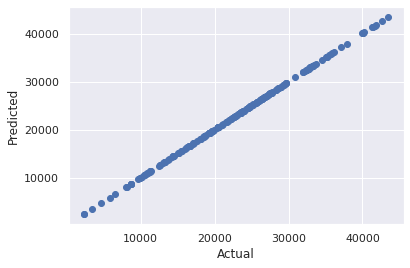

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

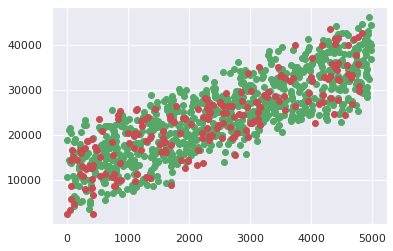

In [ ]:
plt.scatter(X_train[:,0], y_train,color='g') 

plt.scatter(X_test[:,0], y_pred,color='r'); 